# 1. Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.metrics import Accuracy
from keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# 2. Load datasets

In [2]:
df1_raw = pd.read_csv('data\churn-bigml-20.csv')

df2_raw = pd.read_csv('data\churn-bigml-80.csv')

# 3. EDA

## 3.1. Data Understanding

### 3.1.1. Datasets size

In [3]:
print('rows x columns of churn-bigml-20.csv:')
display(df1_raw.shape)

print('rows x columns of churn-bigml-80.csv:')
display(df2_raw.shape)

rows x columns of churn-bigml-20.csv:


(667, 20)

rows x columns of churn-bigml-80.csv:


(2666, 20)

### 3.1.2. Data type of columns

In [4]:
display(df1_raw.dtypes)

State                      object
Account length              int64
Area code                   int64
International plan         object
Voice mail plan            object
Number vmail messages       int64
Total day minutes         float64
Total day calls             int64
Total day charge          float64
Total eve minutes         float64
Total eve calls             int64
Total eve charge          float64
Total night minutes       float64
Total night calls           int64
Total night charge        float64
Total intl minutes        float64
Total intl calls            int64
Total intl charge         float64
Customer service calls      int64
Churn                        bool
dtype: object

In [5]:
display(df2_raw.dtypes)

State                      object
Account length              int64
Area code                   int64
International plan         object
Voice mail plan            object
Number vmail messages       int64
Total day minutes         float64
Total day calls             int64
Total day charge          float64
Total eve minutes         float64
Total eve calls             int64
Total eve charge          float64
Total night minutes       float64
Total night calls           int64
Total night charge        float64
Total intl minutes        float64
Total intl calls            int64
Total intl charge         float64
Customer service calls      int64
Churn                        bool
dtype: object

### 3.1.3. Display several rows of data

In [6]:
display(df1_raw.head(5))

display(df2_raw.head(5))

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False


,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


### 3.1.4. Merger two datasets

In [7]:
df_raw = pd.concat([df1_raw, df2_raw], axis = 0, ignore_index = True)

In [8]:
print('Total number of rows and columns after merging:')
display(df_raw.shape)

Total number of rows and columns after merging:


(3333, 20)

### 3.1.5. Display columns name

In [9]:
cols_name = df_raw.columns
display(cols_name)

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

| Columns                   | Data Types   | Description                                                          |
|---------------------------|--------------|----------------------------------------------------------------------|
| State                     | object       | State code where the customer lives                                  |
| Account length            | int64        | Number of days since the customer opened the account                 |
| Area code                 | int64        | Customer's phone area code                                           |
| International plan        | object       | Does the customer intend to use the international package or not (Yes/No)       |
| Voice mail plan           | object       | Does the customer intend to use the voicemail package (Yes/No)       |
| Number vmail messages     | int64        | Number of customer voicemails messages                               |
| Total day minutes         | float64      | Total number of minutes called by customers during the day           |
| Total day calls           | int64        | Total number of customer calls during the day                        |
| Total day charge          | float64      | Total cost for daytime calls                                         |
| Total eve minutes         | float64      | Total number of minutes of customer calls in the evening             |
| Total eve calls           | int64        | Total number of evening calls from customers                         |
| Total eve charge          | float64      | Total cost for calls in the evening                                  |
| Total night minutes       | float64      | Total number of customer call minutes at night                       |
| Total night calls         | int64        | Total number of customer calls at night                              |
| Total night charge        | float64      | Total cost for calls at night                                        |
| Total intl minutes        | float64      | Total number of international call minutes of the customer           |
| Total intl calls          | int64        | Total number of international calls made by customers                |
| Total intl charge         | float64      | Total cost for international calls                                   |
| Customer service calls    | int64        | Number of times the customer called customer service                 |
| Churn                     | bool         | Whether the customer leaves the service or not (True/False)          |


## 3.2. Data Preprocessing

### 3.2.1. Handle missing value

In [10]:
missVal_count = df_raw.isnull().sum()
print(missVal_count)

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64


It can be seen that our dataset is completely clean

### 3.2.2. Handle outlier value

Calculate Z-Score to identify and count the number of outliers in each column with a Z-Score threshold > 3. In a normal distribution, only about 0.3% of values ​​fall outside ±3 standard deviations, which makes a threshold of 3 a reasonable threshold for detecting outliers.

In [11]:
numeric_df = df_raw.select_dtypes(include=[np.number])

z_scores = np.abs((numeric_df - numeric_df.mean())/numeric_df.std())

threshold = 3
outliers = z_scores > threshold
outliers_count = outliers.sum()
print('Number of outlier values:')
display(outliers_count)

Number of outlier values:


Account length             7
Area code                  0
Number vmail messages      3
Total day minutes          9
Total day calls            9
Total day charge           9
Total eve minutes          9
Total eve calls            7
Total eve charge           9
Total night minutes       11
Total night calls          6
Total night charge        11
Total intl minutes        22
Total intl calls          50
Total intl charge         22
Customer service calls    35
dtype: int64

The number of outliers in the columns is very small compared to the number of rows in the data set, we may not need to process them. If in case building models for predict customer churn, we can handle these outliers.

### 3.2.3. Handle duplicate values

In [12]:
df_cleaned = df_raw.drop_duplicates()

print("Number of rows of data after removing duplicate rows:", len(df_cleaned))


Number of rows of data after removing duplicate rows: 3333


### 3.2.4. Data transformation

In [13]:
df_cleaned = df_cleaned.replace({True: 1, False: 0, 'Yes': 1, 'No': 0})

C:\Users\dung8\AppData\Local\Temp\ipykernel_19796\2992891823.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_cleaned = df_cleaned.replace({True: 1, False: 0, 'Yes': 1, 'No': 0})


## 3.3. Data visualization

In [14]:
df_cleaned.dtypes

State                      object
Account length              int64
Area code                   int64
International plan          int64
Voice mail plan             int64
Number vmail messages       int64
Total day minutes         float64
Total day calls             int64
Total day charge          float64
Total eve minutes         float64
Total eve calls             int64
Total eve charge          float64
Total night minutes       float64
Total night calls           int64
Total night charge        float64
Total intl minutes        float64
Total intl calls            int64
Total intl charge         float64
Customer service calls      int64
Churn                       int64
dtype: object

### 3.3.1. Distribution of data in columns

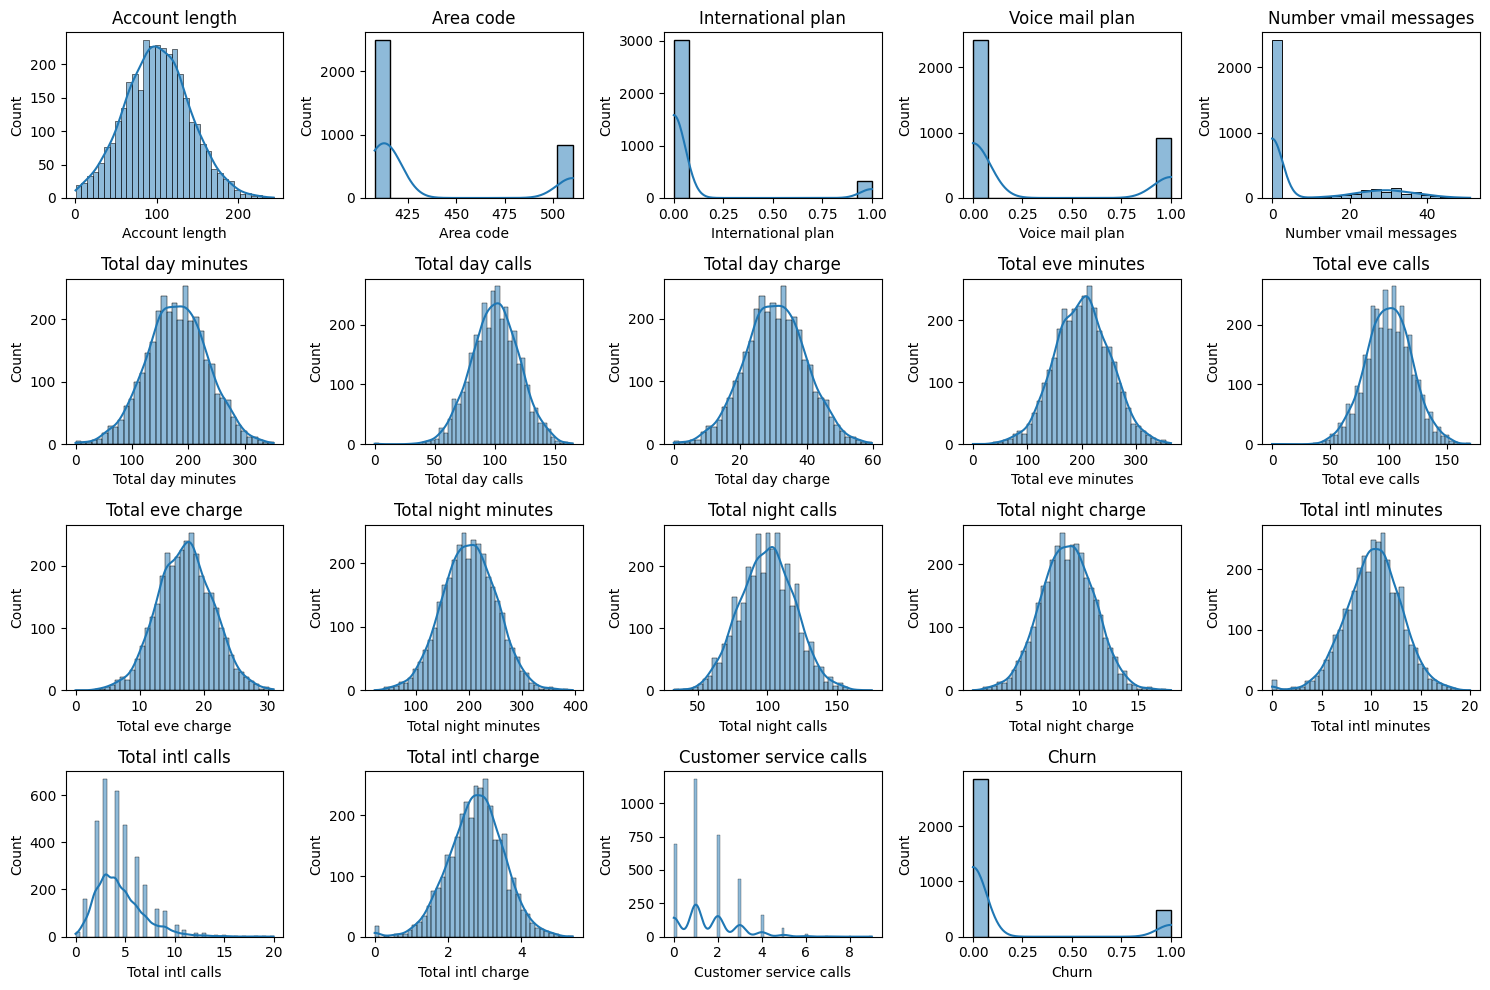

In [15]:
plt.figure(figsize=(15, 10))

for i, column in enumerate(df_cleaned.select_dtypes(include=['int64', 'float64']).columns):
    plt.subplot(4, 5, i + 1)
    sns.histplot(df_cleaned[column], kde=True)
    plt.title(column)

plt.tight_layout()
plt.show()

Through preliminary assessment, it can be observed that:
- Most customer accounts are opened for more than 100 days
- the customer seems to have no intention of using the service international
- The number of customers who want to use voice mail service is about half of the number of customers who do not plan to
- Many customers only call customer service once, or less than twice. The number of customers who do not use this service ranks 3rd in the range from 0 to 9 times
- According to the survey, the number of customers who will leave accounts for nearly 1/6 of the total number of customers participating in the survey.

### 3.3.2. Compare the average number of calls per day

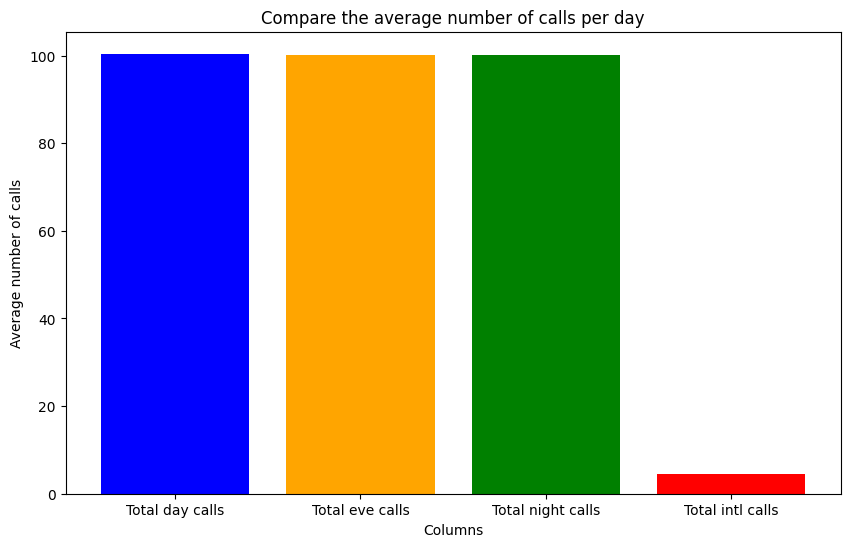

In [16]:
columns = ['Total day calls', 'Total eve calls', 'Total night calls', 'Total intl calls']

values = [df_cleaned[column].mean() for column in columns]

plt.figure(figsize=(10, 6))
plt.bar(columns, values, color=['blue', 'orange', 'green', 'red'])
plt.xlabel('Columns')
plt.ylabel('Average number of calls')
plt.title('Compare the average number of calls per day')
plt.show()


The average number of calls during the day is nearly the same, but the morning is slightly higher

### 3.3.3. Compare day, evening, night and international charge

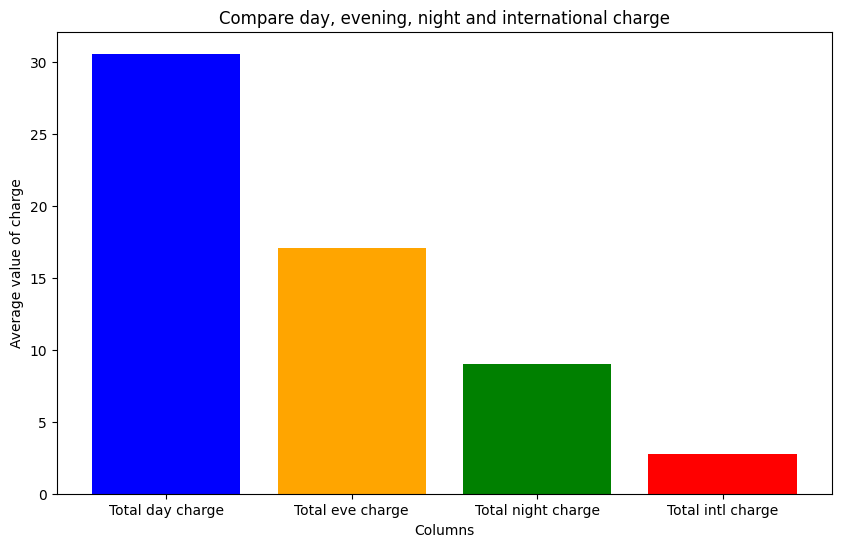

In [17]:
columns = ['Total day charge', 'Total eve charge', 'Total night charge', 'Total intl charge']

values = [df_cleaned[column].mean() for column in columns]

plt.figure(figsize=(10, 6))
plt.bar(columns, values, color=['blue', 'orange', 'green', 'red'])
plt.xlabel('Columns')
plt.ylabel('Average value of charge')
plt.title('Compare day, evening, night and international charge')
plt.show()


It can be seen that on average Total day calls cost the most, perhaps due to higher demand for the service during this period.

### 3.3.4. Correlation chart between variables

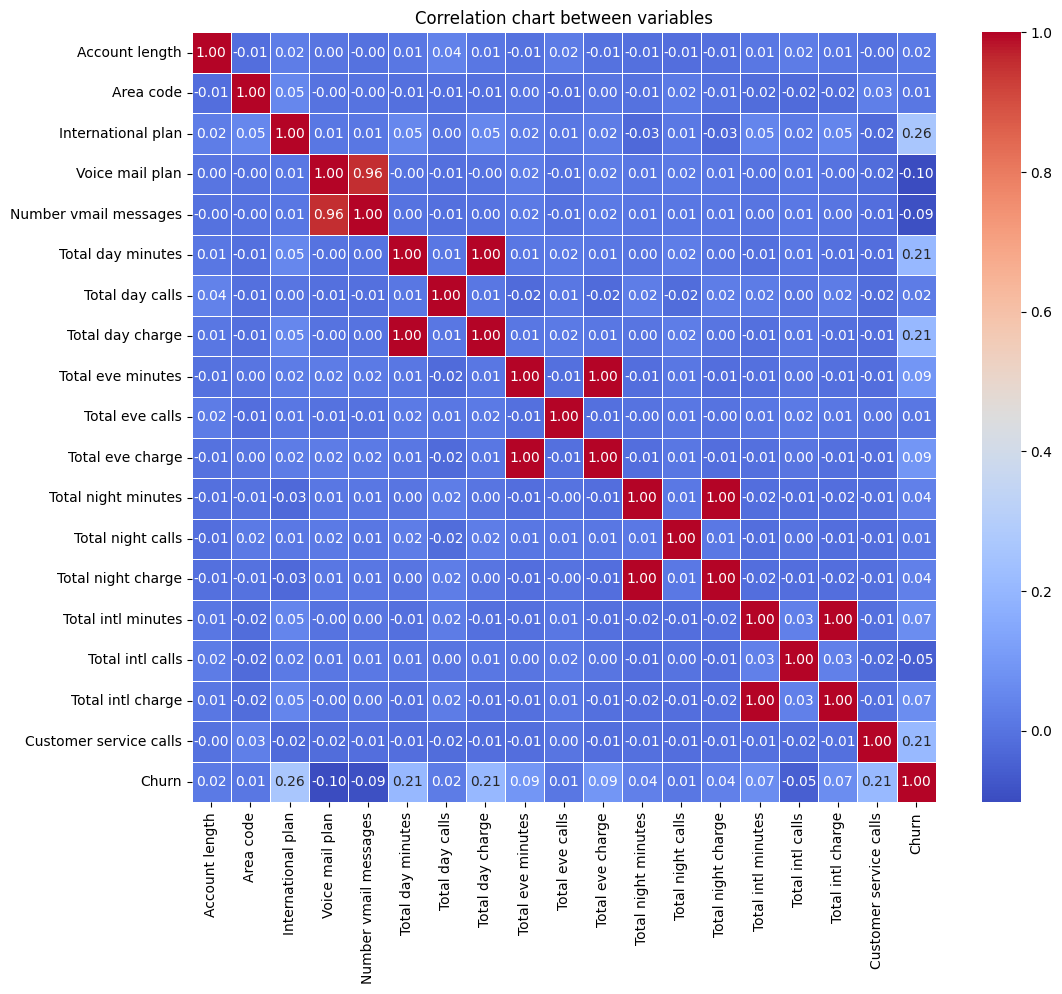

In [18]:
numeric_columns = df_cleaned.select_dtypes(include=['int64', 'float64'])

correlation_matrix = numeric_columns.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation chart between variables')
plt.show()


- It seems that if a customer needs to use international, has a long calling time during the day with high fees, and has a higher number of calls to customer service, then this customer is more likely to leave is huge
- There is a high positive correlation between Voice mail plan and Number vmail messages, Total day minutes and Total day charge, Total eve minutes and Total eve charge, Total night minutes and Total night charge, Total intl minutes and Toal intl charge. We can consider removing one column from these pairs to avoid multicollinearity when building prediction models.

# 4. Build prediction models

## 4.1. Divide data into Train and Test sets to build models

In [19]:
df_filtered = df_cleaned.drop(['State', 'Number vmail messages', 'Total day charge', 
                           'Total eve charge', 'Total night charge', 'Total intl charge'], axis=1)

In [20]:
X = df_filtered.drop('Churn', axis=1)
y = df_filtered['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 4.2. Random Forest Model

In [21]:
rf_model_default = RandomForestClassifier(random_state=42)

rf_model_default.fit(X_train, y_train)

y_pred = rf_model_default.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9430284857571214
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       571
           1       0.91      0.67      0.77        96

    accuracy                           0.94       667
   macro avg       0.93      0.83      0.87       667
weighted avg       0.94      0.94      0.94       667



## 4.3. FNN Model

In [22]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [23]:
model_class = Sequential()

model_class.add(Dense(units=8, activation='relu', name='layer_1'))
model_class.add(Dense(units=8, activation='relu', name='layer_2'))
model_class.add(Dense(units=8, activation='relu', name='layer_3'))
model_class.add(Dense(units=8, activation='relu', name='layer_4'))
model_class.add(Dense(units=1, activation='sigmoid'))

In [24]:
model_class.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_model.keras', monitor='val_accuracy', save_best_only=True)  # Đổi tên thành 'best_model.keras'

history = model_class.fit(
    X_train, y_train,
    epochs=200,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping, checkpoint]
)

Epoch 1/200
84/84 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5136 - loss: 0.6876 - val_accuracy: 0.8561 - val_loss: 0.5306
Epoch 2/200
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8591 - loss: 0.4787 - val_accuracy: 0.8561 - val_loss: 0.4058
Epoch 3/200
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8512 - loss: 0.4109 - val_accuracy: 0.8561 - val_loss: 0.3722
Epoch 4/200
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8480 - loss: 0.3800 - val_accuracy: 0.8561 - val_loss: 0.3497
Epoch 5/200
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8608 - loss: 0.3459 - val_accuracy: 0.8561 - val_loss: 0.3371
Epoch 6/200
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8516 - loss: 0.3405 - val_accuracy: 0.8561 - val_loss: 0.3269
Epoch 7/200
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8640 - loss: 0.3165 - val_accuracy: 0.8576 - val_loss: 0.3235
Epoch 8/200
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8478 - loss: 0.3353 - val_accuracy: 0.8606 - v

In [25]:
loss, accuracy = model_class.evaluate(X_test, y_test)

print(f"Loss trên dữ liệu kiểm tra: {loss}")
print(f"Độ chính xác trên dữ liệu kiểm tra: {accuracy}")

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 900us/step - accuracy: 0.9278 - loss: 0.2103
Loss trên dữ liệu kiểm tra: 0.19535431265830994
Độ chính xác trên dữ liệu kiểm tra: 0.931034505367279
